In [1]:
# import preprocessing packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
# read in the data file
df = pd.read_csv('data/admission_master.csv', low_memory=False)
df.head()

,ID,Accept,HSCity,HST,College,DEGREE_TYPE,MAJOR_CODE,Major,Major Description,First_GEN,...,ADMIT_TYPE,ADMT_DESC,COMP,APP_ENTRY_TERM,RESIDENT_CODE,ENROLL,JESUIT,HSNATION,RELIGION,APPLIED
0,214717,NaN,North Eastham,MA,Dolan School of Business,BS,Business Undeclared,Business Undeclared,Business Undeclared,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,214861,NaN,Bridgeport,CT,Dolan School of Business,BS,Marketing,Marketing,Marketing,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,211022,NaN,Newark,NJ,Dolan School of Business,BS,Marketing,Marketing,Marketing,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,211015,NaN,New York,NY,College of Arts and Sciences,BA,Undeclared,Undeclared,Undeclared,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,204374,NaN,Danbury,CT,Dolan School of Business,BS,Management,Management,Management,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# examine columns, determine which ones will need to be imputed/binned/dropped
df.columns

Index(['ID', 'Accept', 'HSCity', 'HST', 'College', 'DEGREE_TYPE', 'MAJOR_CODE',
       'Major', 'Major Description', 'First_GEN', 'RGPA', 'Rating', 'P_M',
       'Merit', 'DEC', 'APP_DESC', 'ACCP', 'CONF', 'Citizen', 'Sex', 'RES',
       'Class Rank', 'Class Size', 'Class Percentile', 'Active City',
       'Active Region', 'Active Postal', 'Active Country', 'Ethnicity',
       'Test Optional', 'Legacy', 'SAT Math OLD', 'SAT WRI OLD',
       'SAT Verbal OLD', 'Total SAT OLD', 'ACT', 'SAT Reading USE',
       'SAT Math USE', 'SAT Total USE', 'Enroll', 'College Code',
       'Sum Ver & Wri', 'SAT Critical Reading - conversion',
       'SAT Math - conversion', 'SAT Reading NEW', 'SAT Math NEW',
       'SAT Total NEW', 'Ethnicity Code', 'ADMIT_TYPE', 'ADMT_DESC', 'COMP',
       'APP_ENTRY_TERM', 'RESIDENT_CODE', 'ENROLL', 'JESUIT', 'HSNATION',
       'RELIGION', 'APPLIED'],
      dtype='object')

In [4]:
# drop unecessary or duplicate columns 
df = df.drop(['ID','Accept','Enroll','ENROLL','SAT Critical Reading - conversion',
             'SAT Math - conversion','SAT Reading NEW', 'SAT Math NEW', 'SAT Total NEW', 'Ethnicity Code',
       'ADMIT_TYPE', 'ADMT_DESC', 'COMP', 'APP_ENTRY_TERM','SAT Math OLD', 'SAT WRI OLD', 'SAT Verbal OLD',
       'Total SAT OLD','HSNATION','Sum Ver & Wri', 'APPLIED','College Code','MAJOR_CODE','Major Description'], axis=1)
# verify that columns were dropped 
df.columns

Index(['HSCity', 'HST', 'College', 'DEGREE_TYPE', 'Major', 'First_GEN', 'RGPA',
       'Rating', 'P_M', 'Merit', 'DEC', 'APP_DESC', 'ACCP', 'CONF', 'Citizen',
       'Sex', 'RES', 'Class Rank', 'Class Size', 'Class Percentile',
       'Active City', 'Active Region', 'Active Postal', 'Active Country',
       'Ethnicity', 'Test Optional', 'Legacy', 'ACT', 'SAT Reading USE',
       'SAT Math USE', 'SAT Total USE', 'RESIDENT_CODE', 'JESUIT', 'RELIGION'],
      dtype='object')

In [5]:
# filter out the targets 
dfy = df.filter(['ACCP','CONF'])
dfy.to_csv('data/targets.csv', index=0)

# drop the targets from the main dataframe
df = df.drop(['ACCP','CONF','APP_DESC','DEC'], axis=1)
df.columns

Index(['HSCity', 'HST', 'College', 'DEGREE_TYPE', 'Major', 'First_GEN', 'RGPA',
       'Rating', 'P_M', 'Merit', 'Citizen', 'Sex', 'RES', 'Class Rank',
       'Class Size', 'Class Percentile', 'Active City', 'Active Region',
       'Active Postal', 'Active Country', 'Ethnicity', 'Test Optional',
       'Legacy', 'ACT', 'SAT Reading USE', 'SAT Math USE', 'SAT Total USE',
       'RESIDENT_CODE', 'JESUIT', 'RELIGION'],
      dtype='object')

In [6]:
# filter out continuous variables 
dfcont = df.filter(['ACT','SAT Math USE','SAT Reading USE',' SAT Total USE', 'RGPA','Class Rank','Class Size','Class Percentile','Rating'])
dfcont.head()

# drop continuous variables from main dataframe
df = df.drop(['Rating','Class Rank', 'Class Size','Class Percentile','ACT', 'SAT Reading USE', 
              'SAT Math USE','SAT Total USE'], axis=1)

# verify dfcont features 
dfcont.columns

Index(['ACT', 'SAT Math USE', 'SAT Reading USE', 'RGPA', 'Class Rank',
       'Class Size', 'Class Percentile', 'Rating'],
      dtype='object')

In [7]:
# count how many missing values each feature in the main dataframe has 
names = []
val = []

for col in df.columns:
    names.append(col)
    val.append(df[df.columns].isnull().sum())
    break
# print out results as (column_name, # of null values in column_name)
print(names, val)

['HSCity'] [HSCity              298
HST                2564
College               2
DEGREE_TYPE           0
Major                 0
First_GEN         16164
RGPA              25525
P_M               57016
Merit             51243
Citizen              10
Sex                   0
RES               19956
Active City       19968
Active Region      1520
Active Postal     20527
Active Country    19968
Ethnicity           522
Test Optional         0
Legacy            80110
RESIDENT_CODE     77441
JESUIT            96371
RELIGION          79063
dtype: int64]


## Binning

Text(0.5, 1.0, 'College Bins')

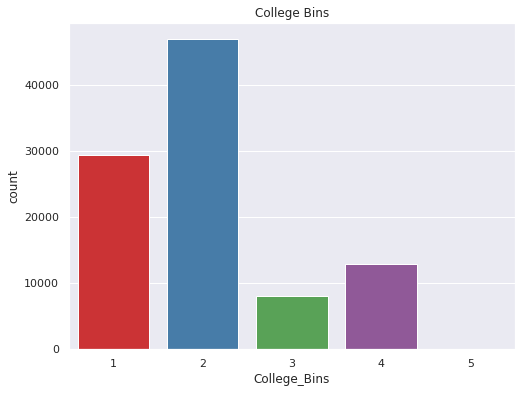

In [8]:
# function for assigning college bins
def assign_college_bins(College):
    if College == 'Dolan School of Business': 
        return(1)
    if College == 'College of Arts & Sciences' or College == 'College of Arts and Sciences':
        return(2)
    if College == 'School of Engineering':
        return(3)    
    if College == 'Egan School of Nursing & Health Sciences' or College == 'Egan School of Nursing and Health Studies':
        return(4)
    else:
        return(5)

# Applying College_Bins function to the DataFrame
df['College_Bins'] = df['College'].apply(assign_college_bins)
df.head()

# verifying College Bins
fig = plt.figure(figsize=(8,6))
ax = sns.countplot(x="College_Bins", data=df, palette='Set1')
plt.title('College Bins')

Text(0.5, 1.0, 'Legacy Bins')

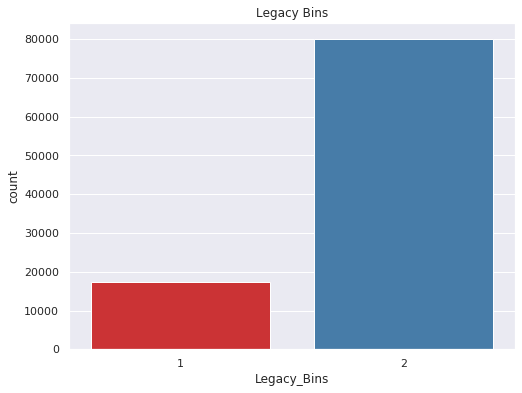

In [9]:
# legacy bins funtion
def assign_legacy_bins(Legacy):
    if Legacy == 'A' or Legacy=='B' or Legacy=='C' or Legacy=='G' or Legacy=='N' or Legacy=='Brother/Sister Current Student' or Legacy=='Brother/Sister of Alumni' or Legacy=='Child/Grandchild of Alumni': 
        return(1)
    else:
        return(2)

# Applying legacy_bins function to the DataFrame
df['Legacy_Bins'] = df['Legacy'].apply(assign_legacy_bins)

# verifying Legacy Bins
fig = plt.figure(figsize=(8,6))
ax = sns.countplot(x="Legacy_Bins", data=df, palette='Set1')
plt.title('Legacy Bins')

Text(0.5, 1.0, 'P_M Bins')

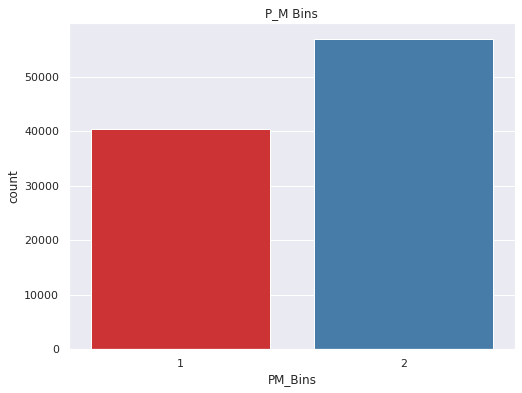

In [10]:
# P_M bins
def assign_pm_bins(P_M):
    if P_M == 'MIN' or P_M=='PLUS': 
        return(1)
    else:
        return(2)
    
# Applying pm_bins function to the DataFrame
df['PM_Bins'] = df['P_M'].apply(assign_pm_bins)

# verifying P_M Bins
fig = plt.figure(figsize=(8,6))
ax = sns.countplot(x="PM_Bins", data=df, palette='Set1')
plt.title('P_M Bins')

Text(0.5, 1.0, 'Merit Bins')

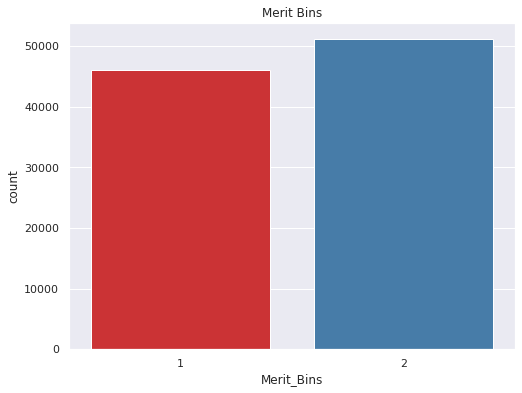

In [11]:
# Merit bins
def assign_merit_bins(Merit):
    if Merit == 'BELL' or Merit=='COMP' or Merit=='COMS' or Merit=='LOY' or Merit=='MAGI' or Merit=='XAV': 
        return(1)
    else:
        return(2)
    
# Applying merit bins function to the DataFrame
df['Merit_Bins'] = df['Merit'].apply(assign_merit_bins)

# verifying Merit Bins
fig = plt.figure(figsize=(8,6))
ax = sns.countplot(x="Merit_Bins", data=df, palette='Set1')
plt.title('Merit Bins')

Text(0.5, 1.0, 'Jesuit Bins')

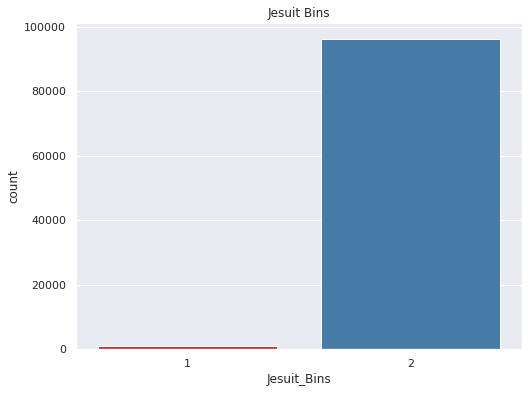

In [12]:
# Jesuit bins
def assign_jesuit_bins(JESUIT):
    if JESUIT=='J': 
        return(1)
    else:
        return(2)
    
# Applying jesuit bins function to the DataFrame
df['Jesuit_Bins'] = df['JESUIT'].apply(assign_jesuit_bins)

# verifying Jesuit Bins
fig = plt.figure(figsize=(8,6))
ax = sns.countplot(x="Jesuit_Bins", data=df, palette='Set1')
plt.title('Jesuit Bins')

Text(0.5, 1.0, 'Religion Bins')

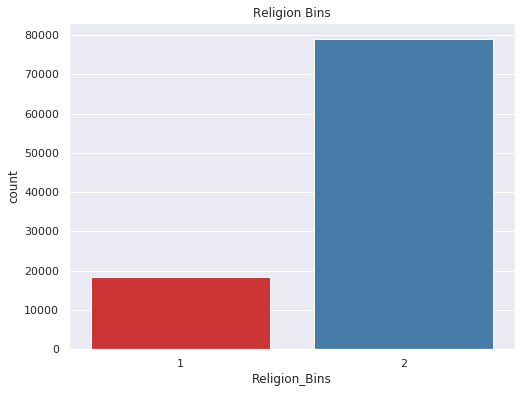

In [13]:
# Religion bins
def assign_religion_bins(RELIGION):
    if RELIGION=='BA' or RELIGION=='BA' or RELIGION=='BU' or RELIGION=='CA' or RELIGION=='CC' or RELIGION=='CH' or RELIGION=='CO' or RELIGION=='CS' or RELIGION=='EP' or RELIGION=='FR' or RELIGION=='HU' or RELIGION=='JE' or RELIGION=='JW' or RELIGION=='LU' or RELIGION=='ME' or RELIGION=='MN' or RELIGION=='MO' or RELIGION=='MU' or RELIGION=='NL' or RELIGION=='NO' or RELIGION=='OC' or RELIGION=='PB' or RELIGION=='PH' or RELIGION=='RE' or RELIGION=='SD' or RELIGION=='SI' or RELIGION=='UN' or RELIGION=='UT': 
        return(1)
    else:
        return(2)
    
# Applying religion function to the DataFrame
df['Religion_Bins'] = df['RELIGION'].apply(assign_religion_bins)

# verifying religion Bins
fig = plt.figure(figsize=(8,6))
ax = sns.countplot(x="Religion_Bins", data=df, palette='Set1')
plt.title('Religion Bins')

Text(0.5, 1.0, 'Ethnicity Bins')

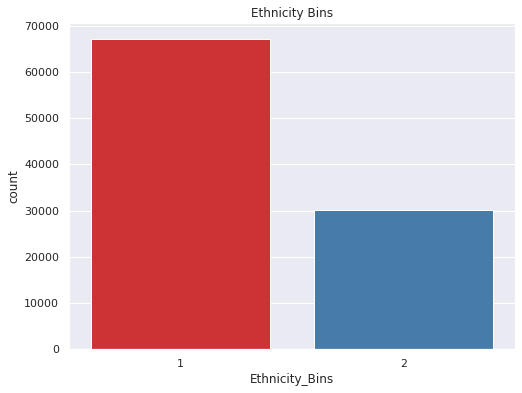

In [14]:
# ethnicity bins
def assign_ethnicity_bins(Ethnicity):
    if Ethnicity=='White' or Ethnicity=='White,Including Spain/Portugal':
        return(1)
    else:
        return(2)

# Applying ethnicity bins function to the DataFrame
df['Ethnicity_Bins'] = df['Ethnicity'].apply(assign_ethnicity_bins)

# verifying Ethnicity Bins
fig = plt.figure(figsize=(8,6))
ax = sns.countplot(x="Ethnicity_Bins", data=df, palette='Set1')
plt.title('Ethnicity Bins')

Text(0.5, 1.0, 'First Generation Bins')

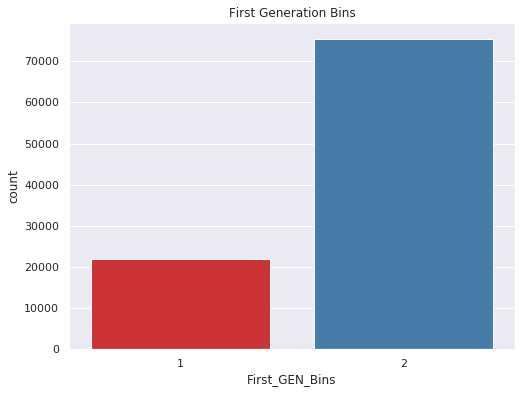

In [15]:
# First Generation bins
def assign_generation_bins(First_GEN):
    if First_GEN=='Y' or First_GEN=='34':
        return(1)
    else:
        return(2)

# Applying first generation bins function to the DataFrame
df['First_GEN_Bins'] = df['First_GEN'].apply(assign_generation_bins)

# verifying First Generation Bins
fig = plt.figure(figsize=(8,6))
ax = sns.countplot(x="First_GEN_Bins", data=df, palette='Set1')
plt.title('First Generation Bins')

Text(0.5, 1.0, 'Citizen Bins')

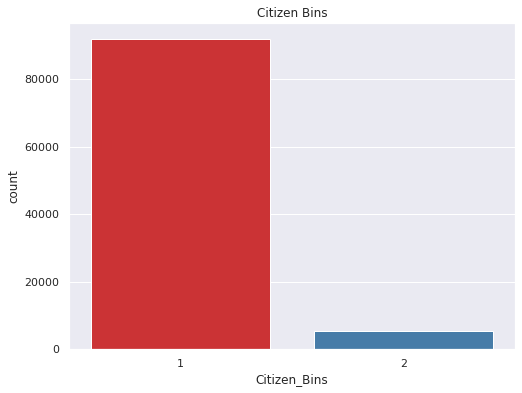

In [16]:
# Citizen Bins
def assign_citizen_bins(Citizen):
    if Citizen=='Citizen' or Citizen=='US':
        return(1)
    else:
        return(2)

# Applying citizen bins function to the DataFrame
df['Citizen_Bins'] = df['Citizen'].apply(assign_citizen_bins)

# verifying Citizen Bins
fig = plt.figure(figsize=(8,6))
ax = sns.countplot(x="Citizen_Bins", data=df, palette='Set1')
plt.title('Citizen Bins')

Text(0.5, 1.0, 'Degree Type Bins')

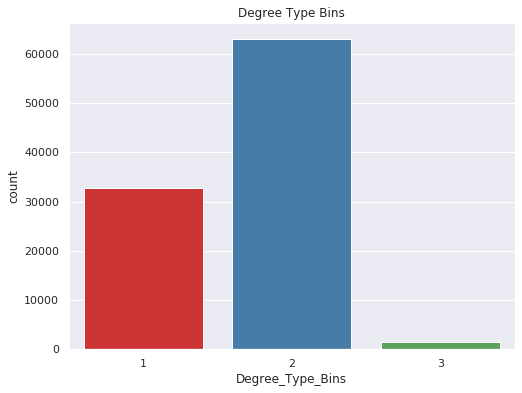

In [17]:
# Citizen Bins
def assign_degree_type_bins(DEGREE_TYPE):
    if DEGREE_TYPE == 'BA':
        return(1)
    if DEGREE_TYPE == 'BS' or DEGREE_TYPE == 'BSE':
        return(2)
    else:
        return(3)

# Applying citizen bins function to the DataFrame
df['Degree_Type_Bins'] = df['DEGREE_TYPE'].apply(assign_degree_type_bins)

# verifying Degree Type Bins
fig = plt.figure(figsize=(8,6))
ax = sns.countplot(x="Degree_Type_Bins", data=df, palette='Set1')
plt.title('Degree Type Bins')

In [18]:
# drop original features that were binned
df = df.drop(['College','First_GEN','P_M', 'Merit', 'Citizen', 'Sex','Ethnicity',
       'Test Optional', 'Legacy','JESUIT', 'RELIGION','DEGREE_TYPE'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97395 entries, 0 to 97394
Data columns (total 20 columns):
HSCity              97097 non-null object
HST                 94831 non-null object
Major               97395 non-null object
RGPA                71870 non-null float64
RES                 77439 non-null object
Active City         77427 non-null object
Active Region       95875 non-null object
Active Postal       76868 non-null object
Active Country      77427 non-null object
RESIDENT_CODE       19954 non-null object
College_Bins        97395 non-null int64
Legacy_Bins         97395 non-null int64
PM_Bins             97395 non-null int64
Merit_Bins          97395 non-null int64
Jesuit_Bins         97395 non-null int64
Religion_Bins       97395 non-null int64
Ethnicity_Bins      97395 non-null int64
First_GEN_Bins      97395 non-null int64
Citizen_Bins        97395 non-null int64
Degree_Type_Bins    97395 non-null int64
dtypes: float64(1), int64(10), object(9)
memory usage: 14.9+

## Imputation of Continuous Variables

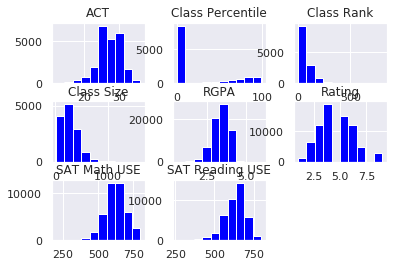

In [19]:
# exmaine the features in the dfcont dataframe 
for col in dfcont.columns:
    dfcont.hist(color='blue')
    break
plt.show()

In [20]:
# replace null value with mean because we have continuous variables and the features are too skewed to use the mode 
for value in dfcont.columns:
    dfcont.fillna(dfcont.median(), inplace=True)
print(dfcont.isnull().sum(axis=0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0]


## Handling Location Features 

In [22]:
# drop rows where HSCity was missing > this was a low impact feature because not many were missing
# also dropped the one row that was missing MAJOR_CODE
df = df.dropna(axis=0, how='any', subset=['HSCity'])
df.head()

,HSCity,HST,Major,RGPA,RES,Active City,Active Region,Active Postal,Active Country,RESIDENT_CODE,College_Bins,Legacy_Bins,PM_Bins,Merit_Bins,Jesuit_Bins,Religion_Bins,Ethnicity_Bins,First_GEN_Bins,Citizen_Bins,Degree_Type_Bins
0,North Eastham,MA,Business Undeclared,2.15,R,South Yarmouth,MA,02664-5229,United States,NaN,1,2,2,2,2,2,2,1,1,2
1,Bridgeport,CT,Marketing,2.52,C,Bridgeport,CT,06606-4225,United States,NaN,1,2,2,2,2,2,2,1,1,2
2,Newark,NJ,Marketing,1.24,R,Newark,NJ,07108-1513,United States,NaN,1,2,2,2,2,2,2,2,1,2
3,New York,NY,Undeclared,1.90,R,Middle Vlg,NY,11379-1960,United States,NaN,2,2,2,2,2,2,1,2,1,1
4,Danbury,CT,Management,NaN,C,Danbury,CT,06810-6735,United States,NaN,1,2,2,2,2,2,2,1,1,2


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97097 entries, 0 to 97394
Data columns (total 20 columns):
HSCity              97097 non-null object
HST                 94814 non-null object
Major               97097 non-null object
RGPA                71854 non-null float64
RES                 77227 non-null object
Active City         77215 non-null object
Active Region       95728 non-null object
Active Postal       76722 non-null object
Active Country      77215 non-null object
RESIDENT_CODE       19868 non-null object
College_Bins        97097 non-null int64
Legacy_Bins         97097 non-null int64
PM_Bins             97097 non-null int64
Merit_Bins          97097 non-null int64
Jesuit_Bins         97097 non-null int64
Religion_Bins       97097 non-null int64
Ethnicity_Bins      97097 non-null int64
First_GEN_Bins      97097 non-null int64
Citizen_Bins        97097 non-null int64
Degree_Type_Bins    97097 non-null int64
dtypes: float64(1), int64(10), object(9)
memory usage: 15.6+

In [24]:
# count how many missing values each feature in the main dataframe has 
names = []
val = []

for col in df.columns:
    names.append(col)
    val.append(df[df.columns].isnull().sum())
    break
# print out results as (column_name, # of null values in column_name)
print(names, val)

['HSCity'] [HSCity                  0
HST                  2283
Major                   0
RGPA                25243
RES                 19870
Active City         19882
Active Region        1369
Active Postal       20375
Active Country      19882
RESIDENT_CODE       77229
College_Bins            0
Legacy_Bins             0
PM_Bins                 0
Merit_Bins              0
Jesuit_Bins             0
Religion_Bins           0
Ethnicity_Bins          0
First_GEN_Bins          0
Citizen_Bins            0
Degree_Type_Bins        0
dtype: int64]
